# Analysis of Bloomington Animal Shelter Animal Care and Control Data: Black Fur-Colored Cat Adoptions
by Baily Jepsen <br>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#analysis">Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Context

> Black cats have historically been deemed undesirable due to superstitions marking them as bad luck. This is largely due to Christianity associating them with the Devil/Satan and therefore witches (Vocelle, 2013). When animals are less desirable than others, animal shelters take on more work and expenses because they are in their care longer. Understanding the relationship between black cats and their adoption rate can be vital information to animal shelters. It can help them estimate a length of time the animal is most likely to be in their care, and therefore adjust adoption costs accordingly through the use of adoption promotions ("Celebrate Black Cat," 2017).

### Hypothesis

> **Null:** Fur color (black vs non-black) is not related to the outcome of a cat.\
> **Alternative:** Fur color (black vs non-black) is related to the outcome of a cat.

### Dataset Description

> The data that will be used for analysis is from Animal Care and Control at the Bloomington Animal Shelter. The dataset resulted from a management software migration that occurred in 2017 (John Snow Labs, 2022). The dataset is publicly available on Kaggle, though John Snow Labs is the original owner. Official licensing information was unavailable for this dataset, except what John Snow Labs describes to be a “Research Data License” (John Snow Labs, 2022). This entails restrictions on commercial use, unless a subscription is purchased. Since I am using the dataset for educational research purposes, the only requirement is to attribute the dataset to John Snow Labs. The dataset can be found using links included in <a href="#references">References</a>.

> The dataset contains 10,290 entries and covers various animals brought in by Animal Care and Control and their movements through the shelter. It utilizes 23 variables to describe each animal and their time spent in the shelter. Columns that contain datetime data are not recognized by Jupyter upon importing the dataset. While not all columns will be utilized in the analysis of this dataset, they are all listed and explained in the Table 01. Table 02 contains the columns that will be used in the analysis.

> Table 01:

| **Column**       | **Type**  | **Description** |
| :--------------- | :-------- | :-------------- |
| id               | Integer   | A unique identification number of the saving animal record in software |
| intakedate       | String    | Intake date of animal |
| intakereason     | String    | Reason for animal intake |
| istransfer       | Boolean   | Was the animal transferred to shelter |
| sheltercode      | String    | Unique code for shelter |
| identichipnumber | String    | Identity chip number of shelter |
| animalname       | String    | Name of the animal |
| breedname        | String    | Breed name of the animal |
| basecolour       | String    | Color of the animal |
| speciesname      | String    | Name of the animal species |
| animalage        | String    | Age of the animal |
| sexname          | String    | Gender of the animal |
| location         | String    | Location where animal was taken care of in the shelter |
| movementdate     | String    | Date when the animal was moved for care |
| movementtype     | String    | Type of animal movement |
| istrial          | Boolean   | Was the animal on trial |
| returneddate     | String    | Date when the animal was returned |
| returnedreason   | String    | Reason for returning the animal |
| deceaseddate     | String    | Date of the animal's death |
| deceasedreason   | String    | Reason for the animal's death |
| diedoffshelter   | Boolean   | Was the animal death off shelter |
| puttosleep       | Boolean   | Was the animal put to sleep |
| isdoa            | Boolean   | Was the animal dead when it arrived |

> Table 02:

| **Column**       | **Type**  | **Description** |
| :--------------- | :-------- | :-------------- |
| id               | Integer   | A unique identification number of the saving animal record in software |
| basecolour       | String    | Color of the animal |
| speciesname      | String    | Name of the animal species |
| movementtype     | String    | Type of animal movement |
| puttosleep       | Boolean   | Was the animal put to sleep |

In [1]:
# Import statements for packages.
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as st
from scipy.stats import chi2_contingency 
from scipy.stats.contingency import association

import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading the data and displaying five rows.
df = pd.read_csv('animal-data-1.csv')

df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
1,15932,2009-12-08,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,2012-08-10,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
3,30812,2013-01-11,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18,Foster,False,2018-05-29,Stray,NaN,Died in care,False,False,False
4,30812,2013-01-11,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2018-05-29,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False


In [3]:
# Confirm the number of rows and columns in the dataset.
rows = df.shape[0]
columns = df.shape[1]

print('There are {} rows and {} columns in the dataset.'.format(rows, columns))

There are 10290 rows and 23 columns in the dataset.


### Duplicated/Missing Data

In [4]:
# Are there any duplicated rows in the dataset?
duplicated_rows = sum(df.duplicated())

print('There are {} duplicated rows in the dataset.'.format(duplicated_rows))

There are 0 duplicated rows in the dataset.


In [5]:
# Are there any variables with missing values?
df.isnull().sum()

id                     0
intakedate             0
intakereason           2
istransfer             0
sheltercode            0
identichipnumber    1966
animalname             0
breedname             45
basecolour             0
speciesname            0
animalage              0
sexname                0
location               0
movementdate           0
movementtype           0
istrial                0
returndate          7034
returnedreason         0
deceaseddate        9964
deceasedreason         0
diedoffshelter         0
puttosleep             0
isdoa                  0
dtype: int64

> While there are variables with missing values in the dataset (`intakereason`, `identichipnumber`, `breedname`, `returndate`, and `deceaseddate`), these will not be used in the analysis.

### Column Properties

In [6]:
# Find the data type for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10290 non-null  int64 
 1   intakedate        10290 non-null  object
 2   intakereason      10288 non-null  object
 3   istransfer        10290 non-null  bool  
 4   sheltercode       10290 non-null  object
 5   identichipnumber  8324 non-null   object
 6   animalname        10290 non-null  object
 7   breedname         10245 non-null  object
 8   basecolour        10290 non-null  object
 9   speciesname       10290 non-null  object
 10  animalage         10290 non-null  object
 11  sexname           10290 non-null  object
 12  location          10290 non-null  object
 13  movementdate      10290 non-null  object
 14  movementtype      10290 non-null  object
 15  istrial           10290 non-null  bool  
 16  returndate        3256 non-null   object
 17  returnedreas

> The dataset is composed of integer, string, and boolean data types. Jupyter has not recognized the datetime data type from the CSV file. This is fine because we do not need any of the dates for analysis.

In [7]:
# Find the number of unique values in each column.
df.nunique()

id                  7288
intakedate           885
intakereason          25
istransfer             2
sheltercode         7288
identichipnumber     305
animalname          4336
breedname            799
basecolour            78
speciesname           27
animalage            273
sexname                3
location              39
movementdate         872
movementtype           7
istrial                1
returndate           756
returnedreason        24
deceaseddate         211
deceasedreason        13
diedoffshelter         2
puttosleep             2
isdoa                  2
dtype: int64

> While there are 10,290 rows in this dataset, there are only 7,288 unique animals as indicated by the total number of unique IDs.

### Data Cleaning

> 1. Though the dataset contains missing values, those columns that contain the missing values are not pertinent to the analysis. These columns are considered extraneous and will be dropped from the dataset. 

> 2. Column labels require formatting for clarity.

> 3. Since our analysis is focusing on cats, any animals that do not have "Cat" in the `speciesname` (`species_name`) column will be dropped.

> 4. If a cat has been "Reclaimed", we will consider that outcome to be the same as an "Adoption". This will require converting "Reclaimed" values to "Adoption" in the `movementtype` (`movement_type`) column.

> 5. If a cat has the value "TRUE" in the `puttosleep` (`put_to_sleep`) column, the value for `movementtype` (`movement_type`) will become "Euthanasia".

> 6. If a cat has the value "Black" in the `furcolor` (`fur_color`) column, the value for a new boolean column `is_black` will be "True". Otherwise, the value for `is_black` will be "False".

> 7. Rows that contain a `movementtype` (`movement_type`) value that is not needed for analysis will be dropped.

> 8. The `basecolour` (`fur_color`) column contains multiple formatting errors, most likely due to various people inputting and handling the data. These contain:
    * 8a. Repeating values ("Brown and Black" and "Black and Brown").
    * 8b. Missing commas ("Grey Black and White" vs "Black, Brown and White").
    * 8c. Lowercase letters ("grey and Black" vs "Grey and Black").

> 9. The dataset does contain a type of duplicate values that need to be dealt with. For the purpose of our analysis, the dataset cannot contain a cat that has been transferred then adopted. This is because we are using the `transfer` value to indicate a cat that has not been adopted. In order to solve this, a duplicate `id` that has a `movementtype` (`movement_type`) of "Transfer" will be dropped. The "Adoption" entry is then preserved in the dataset, resulting in each `id` appearing only once in the dataset.

In [8]:
# 1. Remove extraneous columns that are not needed for analysis.
df_clean = df.drop(['intakedate', 'intakereason', 'istransfer', 'sheltercode', 'identichipnumber', 'animalname', 'breedname', 
                    'animalage', 'sexname', 'location', 'movementdate', 'istrial', 'returndate', 'returnedreason', 
                    'deceaseddate', 'deceasedreason', 'diedoffshelter', 'isdoa'], axis=1)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            10290 non-null  int64 
 1   basecolour    10290 non-null  object
 2   speciesname   10290 non-null  object
 3   movementtype  10290 non-null  object
 4   puttosleep    10290 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 331.7+ KB


In [9]:
# 2. Insert underscores in column headings for clarity.
df_clean.rename(columns={'basecolour': 'fur_color'}, inplace=True)
df_clean.rename(columns={'speciesname': 'species_name'}, inplace=True)
df_clean.rename(columns={'movementtype': 'movement_type'}, inplace=True)
df_clean.rename(columns={'puttosleep': 'put_to_sleep'}, inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             10290 non-null  int64 
 1   fur_color      10290 non-null  object
 2   species_name   10290 non-null  object
 3   movement_type  10290 non-null  object
 4   put_to_sleep   10290 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 331.7+ KB


In [10]:
# 3. Remove rows that do not include "Cat" in species_name.
df_clean = df_clean.loc[df_clean['species_name'] == 'Cat']

df_clean.species_name.unique()

array(['Cat'], dtype=object)

In [11]:
# 4. Convert "Reclaimed" to "Adoption" in the movement_type column.
df_clean['movement_type'] = df_clean['movement_type'].str.replace('Reclaimed', 'Adoption')

df_clean.movement_type.unique()

array(['Adoption', 'Foster', 'Transfer', 'Stolen', 'Escaped',
       'Released To Wild'], dtype=object)

In [12]:
# 5. If an animal was "put to sleep", change movement_type to "Euthenasia".
df_clean['movement_type'].mask(df_clean['put_to_sleep'] == True, 'Euthanasia', inplace=True)
df_clean.movement_type.unique()

array(['Adoption', 'Foster', 'Euthanasia', 'Transfer', 'Stolen',
       'Escaped', 'Released To Wild'], dtype=object)

In [13]:
# 6. Create a new boolean column, is_black, based on the fur_color column (Zach, 2022).
df_clean['is_black'] = np.where(df_clean['fur_color'] == 'Black', True, False)
df_clean.head()

,id,fur_color,species_name,movement_type,put_to_sleep,is_black
0,15801,Tortie,Cat,Adoption,False,False
3,30812,Dilute tortoiseshell,Cat,Foster,False,False
4,30812,Dilute tortoiseshell,Cat,Adoption,False,False
12,46437,Black,Cat,Euthanasia,True,True
13,46437,Black,Cat,Euthanasia,True,True


In [14]:
# 7. Remove "Stolen", "Escaped", "Released To Wild", and "Foster" movement_type entries.
df_clean = df_clean.loc[df_clean['movement_type'] != 'Stolen']
df_clean = df_clean.loc[df_clean['movement_type'] != 'Escaped']
df_clean = df_clean.loc[df_clean['movement_type'] != 'Released To Wild']
df_clean = df_clean.loc[df_clean['movement_type'] != 'Foster']

df_clean.movement_type.unique()

array(['Adoption', 'Euthanasia', 'Transfer'], dtype=object)

In [15]:
# 8a. Combine fur_color values that have the same two colors.
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Brown and Black', 'Black and Brown')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Tan and Black', 'Black and Tan')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('White and Black', 'Black and White')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('grey and Black', 'Black and Grey')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Grey and black', 'Black and Grey')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Brown, Black and White', 'Black, Brown and White')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Brown and White', 'White and Brown')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Grey and White', 'White and Grey')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Orange and White', 'White and Orange')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Tabby and White', 'White and Tabby')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Tan and White', 'White and Tan')

# 8b. Fix fur_color value with missing comma.
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Grey Black and White', 'Grey, Black and White')

# 8c. Fix fur_color values with lowercase letters.
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Black and grey', 'Black and Grey')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Buff and white', 'Buff and White')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Dilute calico', 'Dilute Calico')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Dilute tortoiseshell', 'Dilute Tortoiseshell')
df_clean['fur_color'] = df_clean['fur_color'].str.replace('Lynx point', 'Lynx Point')

df_clean.fur_color.unique()

array(['Tortie', 'Dilute Tortoiseshell', 'Black', 'Seal',
       'White and Grey', 'Black and Brown', 'Torbie', 'Various', 'Grey',
       'Black and White', 'White and Orange', 'White', 'Buff', 'Fawn',
       'Orange', 'Brown', 'Golden', 'Tabby', 'Tabbico', 'Cream',
       'White and Tan', 'Lilac', 'Silver', 'Black and Grey',
       'Black Tortie', 'Dilute Calico', 'Black, White and Brown',
       'Calico', 'White and Tabby', 'Blue Point', 'White and Brown',
       'Lilac Point', 'Flame Point', 'Lynx Point', 'Buff and White',
       'Siver and Black', 'Tortie and White', 'Black and Tan',
       'Chocolate Point', 'Tortie Point', 'Blue', 'Chocolate',
       'Brindle and Black', 'Tan and Brown', 'Seal Point', 'Tricolour',
       'Grey, Black and White', 'Cinnamon', 'Smoke'], dtype=object)

In [16]:
# 9. Drop rows where an id references two different movement_type values (EdChum, 2016).
df_clean = df_clean.loc[(df_clean['movement_type'] == 'Adoption') | ~df_clean['id'].duplicated()]
df_clean = df_clean.loc[(df_clean['movement_type'] == 'Transfer') | ~df_clean['id'].duplicated()]

# Confirm there are no id values that are duplicates.
duplicated_ids = sum(df_clean.id.duplicated() == True)
print('There are {} duplicated ids in the dataset.'.format(duplicated_ids))

There are 0 duplicated ids in the dataset.


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3603 entries, 0 to 10285
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3603 non-null   int64 
 1   fur_color      3603 non-null   object
 2   species_name   3603 non-null   object
 3   movement_type  3603 non-null   object
 4   put_to_sleep   3603 non-null   bool  
 5   is_black       3603 non-null   bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 147.8+ KB


In [18]:
df_clean.isnull().sum()

id               0
fur_color        0
species_name     0
movement_type    0
put_to_sleep     0
is_black         0
dtype: int64

In [19]:
df_clean.nunique()

id               3603
fur_color          49
species_name        1
movement_type       3
put_to_sleep        2
is_black            2
dtype: int64

> The dataset is now clean. There are no longer any extraneous rows or columns, formatting errors, extraneous `movement_type` values, missing values, or duplicate values. The dataset now contains:
> - 3,603 unique animals
> - 49 `fur_color` values
> - 1 `species_type` value: "Cat"
> - 3 `movement_type` values: "Adoption", "Euthanasia", or "Transfer"
> - Boolean `put_to_sleep`
> - Boolean `is_black`

<a id='analysis'></a>
## Data Analysis

### Techniques & Justification
> I will use correlation tests to find if there is a correlation between fur color and adoption likelihood, focusing on black cats. I will do so by utilizing a bar graph to visualize the number of cats in each `movement_type`, a contingency table and heatmap to visualize frequency distribution, the Chi-Square Test of Independence to test whether `is_black` has any relationship with `movement_type`, and Cramér’s V to measure the strength of the relationship between `is_black` and `movement_type`.

> Since the data that I am analyzing is categorical and nominal, I am limited in the number of techniques available for analysis. The Chi-Square Test of Independence measures statistical significance, while Cramér’s V measures substantive significance. These two techniques will provide information on the presence of a relationship and it’s strength, and therefore assist in providing an answer for the hypothesis.

### Hypothesis

> **Null:** Fur color (black vs non-black) is not related to the outcome of a cat.\
> **Alternative:** Fur color (black vs non-black) is related to the outcome of a cat.

### Visualizations

In [20]:
# Convert the data into a contingency table with frequencies for visualization and use in creation of the heatmap (Pipis, 2020).
contingency = pd.crosstab(df_clean['is_black'], df_clean['movement_type'])
contingency

movement_type,Adoption,Euthanasia,Transfer
is_black,,,
False,2720,64,231
True,514,14,60


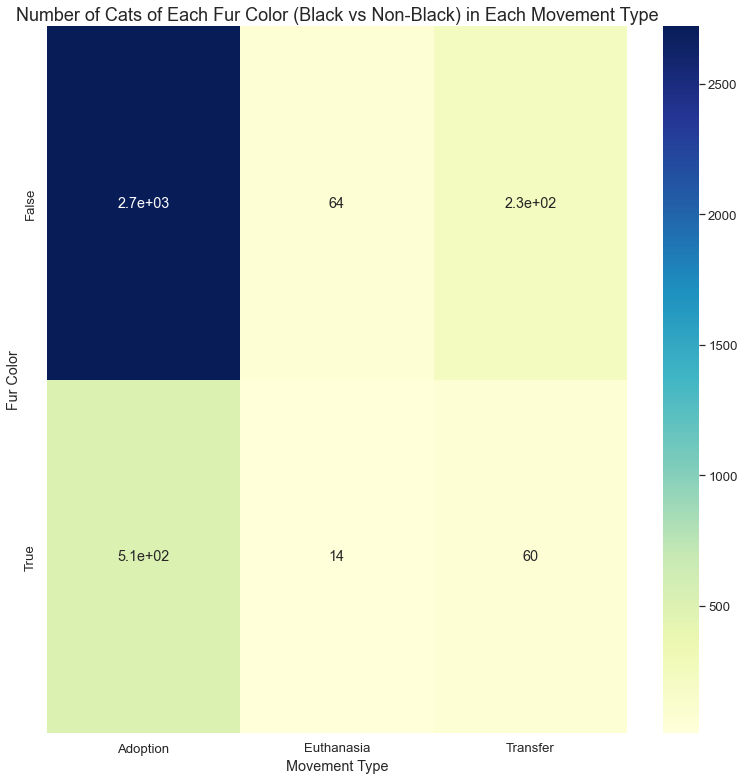

In [21]:
# Visualize the contingency table with a heatmap (Pipis, 2020).
sns.set(font_scale=1.2)
plt.figure(figsize=(13,13));
plt.title('Number of Cats of Each Fur Color (Black vs Non-Black) in Each Movement Type', fontsize=18);

s = sns.heatmap(contingency, annot=True, cmap="YlGnBu");
s.set(xlabel='Movement Type', ylabel='Fur Color');

### Chi-Square Test of Independence

In [22]:
# Perform the Chi-Square Test of Independence (Pipis, 2020).
c, p, dof, expected = chi2_contingency(contingency)
print('The p-value is {}.'.format(p))

The p-value is 0.10438440667130137.


In [23]:
print('The degree of freedom is {}.'.format(dof))

The degree of freedom is 2.


> The p-value is 10.44%. With a common threshold of 0.05, and a degree of freedom (`d_f`) of 2, the critical Chi-Square value is 5.99% (Glen, n.d.). This shows that there is statistical significance between `fur_color` and `movement_type` therefore we fail to reject the alternative hypothesis (Turney, 2023).

### Cramér’s V

In [24]:
# Calculate Cramér’s V (Scipy.Stats.contingency.association, n.d.).
cramers_v = association(contingency, method='cramer')
print('The Cramer\'s V value is {}.'.format(cramers_v))

The Cramer's V value is 0.03541651750170314.


> The Cramér’s V value is 0.03541651750170314. Given a degree of freedom of 1 (2 rows - 1), this indicates a small/weak relationship between `is_black` and `movement_type` (Zach, 2021).

<a id='conclusion'></a>
## Conclusion

### Does fur color have a strong or weak relationship with the outcome of a cat?

> A Chi-Square Test of Independence was performed utilizing the `is_black` and `movement_type` columns. This produced a p-value of 10.44% and a critical Chi-Square value of 5.99%, showing statistical significance between `is_black` and `movement_type`. A Cramér’s V test was performed on the contingency table, resulting in a Cramér’s V value of 0.03541651750170314. With a degree of freedom of 1, this indicates a small/weak relationship between `is_black` and `movement_type`. 

> Because there is statistical significance and a small/weak realtionship between `is_black` and `movement_type`, the analysis has failed to reject the alternative hypothesis. Fur color (black vs non-black) is related to the outcome of a cat, though the relationship is weak.

### Limitations

> I encountered two limitations during the investigation and analysis of the Bloomington Animal Shelter: Animal Care and Control dataset. The data originates from only one shelter during a span of time that is unconfirmed. The first is a limiation because it only reports on animals from one geographic location, and therefore is not an accurate representation of the experiences of adoptable animals on a more global scale. The second is a limiation because while the dataset is claimed to originate from a management software migration that occurred in 2017, there are dates included that span into 2019. There is also a large amount of entries with missing dates. Therefore the span of time that the dataset covers is undertermined.



<a id='references'></a>
### References

> *Celebrate black cat appreciation day on August 17!* (2017, August 15). ASPCA. <br> https://www.aspca.org/news/its-black-cat-appreciation-day

> EdChum. (2016, July 26). *Pandas: Remove some duplicate values based on conditions.* Stack Overflow. <br> https://stackoverflow.com/questions/38584061/pandas-remove-some-duplicate-values-based-on-conditions

> Glen, S. (n.d.). *Chi Squared table (Right tail).* Statistics How To. <br> https://www.statisticshowto.com/tables/chi-squared-table-right-tail/

> John Snow Labs. (2022, November 29). *Bloomington Animal Care and Control adopted animals.* John Snow Labs. <br> https://www.johnsnowlabs.com/marketplace/bloomington-animal-care-and-control-adopted-animals/

> Pipis, G. (2020, October 24). *How to run the Chi-Square test in Python.* Medium. <br> https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d

> *Scipy.Stats.contingency.association.* (n.d.). SciPY v1.11.3 Manual.  <br> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

> The Devastator. (2022, December 4). *Adoptions by breed and date.* Kaggle. <br> https://www.kaggle.com/datasets/thedevastator/analyzing-adoption-trends-at-the-bloomington-ani

> Turney, S. (2023, June 22). *Chi-Square Test of Independence | Formula, guide & examples.* Scribbr. <br> https://www.scribbr.com/statistics/chi-square-test-of-independence/

> Vocelle, L. (2019, June 29). *History of the cat in the Middle Ages (Part 2).* THE GREAT CAT. <br> https://www.thegreatcat.org/history-of-the-cat-in-the-middle-ages-part-2/

> Zach. (2021, September 30). *How to interpret Cramer’s V (With examples).* Statology. <br> 
https://www.statology.org/interpret-cramers-v/

> Zach. (2022, October 4). *Pandas: How to create boolean column based on condition.* Statology. <br> https://www.statology.org/pandas-create-boolean-column-based-on-condition/